In [22]:
import pydpmd as dp
from pydpmd.utils import join_systems
from system_building_resources import *
import numpy as np
import os
import matplotlib.pyplot as plt
from pydpmd.plot import draw_particles_frame, create_animation, downsample, draw_circle

In [14]:
data = dp.data.load('/home/mmccraw/dev/data/12-01-25/specific-heat/ic-jammed/rb-small/T-1.00e-05/mu-0.05-nv-7/delta_phi-1.000e-06/', location=['final', 'init'], load_trajectory=True)

(array([1., 0., 1., 2., 1., 1., 0., 1., 2., 1.]),
 array([1.0265278 , 1.04962668, 1.07272556, 1.09582445, 1.11892333,
        1.14202221, 1.16512109, 1.18821997, 1.21131886, 1.23441774,
        1.25751662]),
 <BarContainer object of 10 artists>)

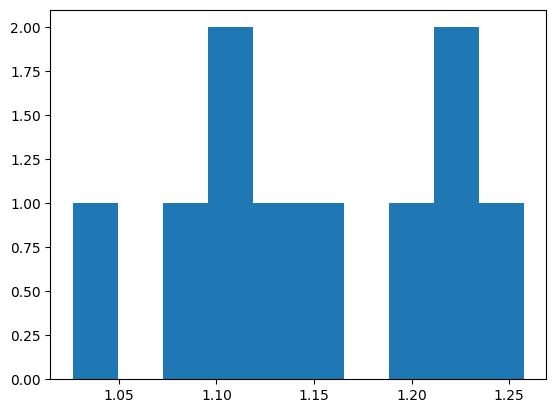

In [35]:
pe_l = np.mean(data.trajectory.pe, axis=0)
ke_l = np.mean(data.trajectory.ke, axis=0)
te_l = pe_l + ke_l

pe = np.mean(data.trajectory.pe_total, axis=0)
ke = np.mean(data.trajectory.ke_total, axis=0)
te = pe + ke
N = data.system_size - 1
d = 3
N_dof = d * N
temp = 2 * ke / N_dof

oid = 0
m = data.original_id == oid

C_v, _ = np.polyfit(temp[m], te[m], 1)

C_vs = []
for i in range(data.system_size[oid]):
    loc = data.system_offset[:-1][m] + i
    C_v, _ = np.polyfit(ke_l[loc], te_l[loc], 1)
    C_vs.append(C_v)
    # plt.scatter(ke_l[loc], te_l[loc])
plt.hist(C_vs)

In [23]:
desired_frames = 100
steps_to_animate = downsample(data, desired_frames)

output_path = "anim.gif"

# Create the animation using the downsampled steps
create_animation(
    update_func=draw_particles_frame,
    frames=steps_to_animate,
    filename=output_path,
    fps=15,
    bitrate=3000,
    data=data,
    system_id=5,
    use_pbc=True,
    which='particle',
    cmap_name='grey',
    id_scale=1.1
)

Creating animation:  11%|█         | 11/100 [00:00<00:00, 99.75it/s]

Saving animation to anim.gif...


Creating animation: 101it [00:01, 51.56it/s]                        

Animation saved successfully!
